In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor

la fonction make_regression est très utile. La fonction prend
comme arguments (c’est le mot pour désigner inputs) le nombre
d’échantillons à générer, le nombre de variables et le bruit puis nous
retourne deux vecteurs 𝒙 et 𝒚.
Pour maitriser l’aléatoire, on écrit la ligne np.random.seed(0).
Finalement, pour visualiser nos données on utilise la fonction
plt.scatter(x, y).

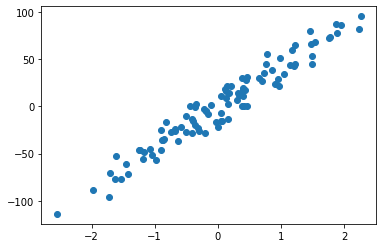

In [2]:
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x,y)

Développer le modèle et l’entraîner
Pour développer et entraîner un modèle, il a fallu beaucoup de maths
dans le chapitre 2 : Entre la Fonction Coût, les dérivées, l’algorithme de
Gradient Descent…
Dans Sklearn, tout cela est déjà fait pour vous !

Il vous suffit de définir une variable model depuis le générateur
SGDRegressor en entrant le nombre d’itérations que le Gradient Descent
doit effectuer ainsi que le Learning Rate.
Une fois le modèle défini, il vous faut l’entraîner. Pour cela, il suffit
d’utiliser la fonction fit.

Par exemple, entraînons notre modèle sur 100 itérations avec un
Learning rate de 0.0001 :

In [3]:
model = SGDRegressor(max_iter=10000, eta0=0.0001)
model.fit(x,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Nous pouvons maintenant observez la précision de notre modèle en
utilisant la fonction score qui calcule le coefficient de détermination
entre le modèle et les valeurs 𝒚 de notre Dataset.
On peut aussi utiliser notre modèle pour faire de nouvelles prédictions
avec la fonction predict et tracer ces résultats avec la fonction
plt.plot :

Coeff R² = 0.9402562362167767


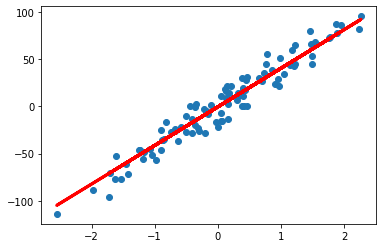

In [4]:
print('Coeff R² =', model.score(x,y))
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red', lw=3)

Wow ! Notre modèle semble vraiment mauvais. C’est parce que nous ne
l’avons pas entraîné suffisamment longtemps et parce que le Learning
rate était trop faible. Aucun problème, il est possible de le ré-entraîner
avec de meilleurs hyper-paramètres.
En Machine Learning, les valeurs qui fonctionnent bien pour la plupart
des entraînements sont :
• Nombre d’itérations = 1000
• Learning rate = 0.001

In [5]:
model = SGDRegressor(max_iter=10000, eta0=0.0001)
model.fit(x,y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Coeff R² = 0.9402568147970183


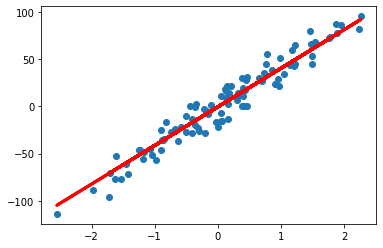

In [6]:
print('Coeff R² =', model.score(x,y))
plt.scatter(x,y)
plt.plot(x, model.predict(x), c='red', lw=3)

Fantastico ! Vous avez entraîné votre premier modèle de Machine
Learning, et il fonctionne vraiment bien avec un coefficient 𝑅2 = 94%. Vous
pourriez maintenant vous en servir pour faire de bonnes prédictions ! Par
exemple pour prédire le prix d’un appartement selon sa surface habitable,
ou bien pour prédire l’évolution de la température sur Terre.
Mais peut-être n’êtes-vous pas très satisfait… On peut aussi faire ce genre
de chose dans Excel, pourquoi se compliquer la vie ?

Certes, mais les choses vont commencer à devenir plus excitantes dans les
prochaines pages quand nous allons développer des modèles à partir de
centaines de variables (ici nous n’en avions qu’une : 𝒙)
Mais auparavant, je vais vous montrer comment votre machine a appris
les paramètres du modèle avec le Gradient Descent. Pour cela, il existe ce
qu’on appelle les courbes d’apprentissage.

Les courbes d’apprentissage

En Machine Learning, on appelle courbe d’apprentissage (Learning
curves) les courbes qui montrent l’évolution de la Fonction Coût au fil
des itérations de Gradient Descent. Si votre modèle apprend, alors sa
Fonction Coût doit diminuer avec le temps, comme ci-dessous :

In [13]:
#definir la fonction modele
def model(x, theta):
    x.shape: (m, n)
    theta.shape: (n,1)
    return x.dot(theta) #shape: (m, 1)


In [14]:
#definir la fonction cout
def cost_function(x, y, theta):
    m = len(y)
    J = 1/(2*m) * np.sum((model(x, theta) - y)**2)
    return J


In [15]:
#definit la fonction gradient
def gradient(x, y, theta):
    return 1/m * x.T.dot((x.dot(theta) - y))

In [16]:
#algorithme de Gradient Descent
def gradient_descent(x, y, theta, learning_rate =0.001, iterations = 1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2)).reshape(m,1)
    
    for i in range(0, iterations):
        prediction = model(x, theta)
        theta = theta - learning_rate * gradient(x, y, theta)
        cost_history[i] = cost_function(x, y, theta)
        theta_history[i,:] = theta.T
        
    return theta, cost_history, theta_history


In [11]:
# utilisation de l'algorithme
np.random.seed(0)
theta = np.random.randn(2, 1)
iterations = 10
learning_rate = 0.3
theta_final, cost_history, theta_history = gradient_descent(x, y, theta, learning_rate=learning_rate, iterations = iterations)
print(theta_history.shape)

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')

_=ax.plot(range(iterations),cost_history)

# visualisation du modele au cours de son apprentissage
fig,ax = plt.subplots(figsize=(12,8))
_=ax.plot(x, y, 'b.')
for i in range(iterations):
    _=ax.plot(x, model(X, theta_history[i]), lw=1)

ValueError: shapes (100,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(Iterations), cost_history)

Regression polynomiale

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

In [ ]:
np.random.seed(0)
# création du Dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y**2 # y ne varie plus linéairement selon x !

In [ ]:
# On ajoute des variables polynômiales dans notre dataset
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x = poly_features.fit_transform(x)

In [ ]:
plt.scatter(x[:,0], y)
x.shape # la dimension de x: 100 lignes et 2 colonnes

In [ ]:
# On entraine le modele comme avant ! rien ne change !
model = SGDRegressor(max_iter=10000, eta0=0.001)
model.fit(x,y)
print('Coeff R2 =', model.score(x, y))
plt.scatter(x[:,0], y, marker='o')
plt.scatter(x[:,0], model.predict(x), c='red', marker='+')

• model = SGDRegressor( nb_itérations, learning_rate)
• model.fit(x, y) : pour entrainer votre modèle.
• model.score(x, y) : pour évaluer votre modèle.
• model.predict(x) : pour générer des prédictions.

Problème de classification exemple modele logistique

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier

In [ ]:
# Génération de données aléatoires: 100 exemples, 2 classes, 2 features x0 et x1
np.random.seed(1)
X, y = make_classification(n_samples=100,n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

In [ ]:
# Visualisation des données
plt.figure(num=None, figsize=(8, 6))
plt.scatter(X[:,0], X[:, 1], marker = 'o', c=y, edgecolors='k')
plt.xlabel('X0')
plt.ylabel('X1')
X.shape

In [ ]:
# Ensuite, nous devons créer un modèle en utilisant SGDClassifier.

In [ ]:
# Génération d'un modele en utilisant la fonction cout 'log' pour Logistic Regression
model = SGDClassifier(max_iter=1000, eta0=0.001, loss='log')
model.fit(X, y)
print('score:', model.score(X, y))

Une fois le modèle entraîné, on peut afficher sa frontière de décision avec
le code suivant…un peu compliqué je vous l’accorde, mais un simple
copier/coller fera l’affaire, pas vrai ?

In [ ]:
# Visualisation des données
h = .02
colors = "bry"
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')
for i, color in zip(model.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor='black', s=20)

Vision par ordinateur avec K-NN dans Jupyter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# importons une base de données de chiffre
digits = load_digits()
X = digits.data
y = digits.target
print('dimension de X:', X.shape)

64 pixels
qui forment les images.
Quand on soumet un nouveau chiffre à la machine, l’algorithme de K-NN
trouve l’exemple du Dataset qui ressemble le plus à notre chiffre, basé
sur le voisin le plus proche pour la valeur de chaque pixel.

L’étape suivante consiste à entraîner le modèle de Nearest Neighbour. En
exécutant le code vous-même, vous devriez obtenir un score de 99%, ce
qui signifie que votre modèle reconnaitra le bon chiffre 99% du temps.
Perso, je trouve ça impressionnant.

In [ ]:
# visualisons un de ces chiffres
plt.imshow(digits['images'][0], cmap = 'Greys_r')
# Entraînement du modele
model = KNeighborsClassifier()
model.fit(X, y)
model.score(X, y)

Pour finir en beauté, testons une image au hasard et voyons si la machine
arrive à identifier de quel chiffre il s’agit. En l’occurrence, j’ai choisi de
tester la 100ième image de notre Dataset, qui est un 4… et la machine a su
la reconnaître !


In [ ]:
#Test du modele
test = digits['images'][100].reshape(1, -1)
plt.imshow(digits['images'][100], cmap = 'Greys_r')
model.predict(test)

Programmer votre premier Réseau de Neurones pour identifier des espèces d’Iris.

Normalement, on développe des Réseaux de Neurones avec un
Framework comme Tensorflow, mais l’apprentissage de cet outil
dépasse un peu le cadre de ce livre. 

Cependant, je veux bien me faire violence en vous montrant comment faire avec Sklearn ☺. Pour cela, il
faudra importer MLPClassifier (qui signifie : Multi-Layer Perceptron Classifier).

Cette fois, je vous propose de développer un programme capable de
reconnaitre une espèce parmi plusieurs de la famille des Iris. 

L’algorithme utilise 4 features pour effectuer son calcul :

• 𝒙𝟏 : La longueur du pétale

• 𝒙𝟐 : La largeur du pétale

• 𝒙𝟑 : La longueur du sépale

• 𝒙𝟒 : La largeur du sépale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier

In [ ]:
# charger les données
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X.shape # notre Dataset comprend 150 exemples et 4 variables

In [ ]:
# Visualisation des donées
colormap=np.array(['Red','green','blue'])
plt.scatter(X[:,3], X[:,1], c = colormap[y])

Pour développer un réseau à 3 hidden layers et 10 neurones dans chaque
layer, j’utilise le code suivant : hidden_layer_sizes=(10, 10, 10)

In [ ]:
# Création du modele
model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model.fit(X, y)
model.score(X, y)

Cela signifie que la machine arrive à prédire la bonne espèce de
fleur 98% du temps